In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), '../..'))

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
from modAL.models import ActiveLearner
from modAL.utilities import classifier_uncertainty
from sklearn.ensemble import RandomForestClassifier

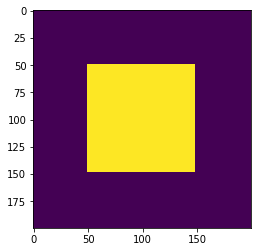

In [3]:
im_width = 200
im_height = 200
data = np.zeros((im_height, im_width))
data[50:199-50, 50:199-50] = 1
plt.imshow(data)

In [4]:
# create the data from the image
pool = np.transpose(
    [np.tile(np.asarray(range(data.shape[0])), data.shape[1]),
     np.repeat(np.asarray(range(data.shape[1])), data.shape[0])]
)
# map the intensity values against the grid
y = np.asarray([data[P[0], P[1]] for P in pool])

# adding 10 points to the dataset
initial_idx = np.random.choice(range(len(y)), size=10)
X_train, y_train = pool[initial_idx], y[initial_idx]
# to make sure that the initial dataset contains at least two classes,
# we repeat the above process until it is satisfied
while len(np.unique(y_train)) == 1:
    initial_idx = np.random.choice(range(len(y)), size=10)
    X_train, y_train = pool[initial_idx], y[initial_idx]

In [10]:
# create an ActiveLearner instance
learner = ActiveLearner(
    predictor=RandomForestClassifier(), utility_function=classifier_uncertainty,
    training_data=X_train, training_labels=y_train
)

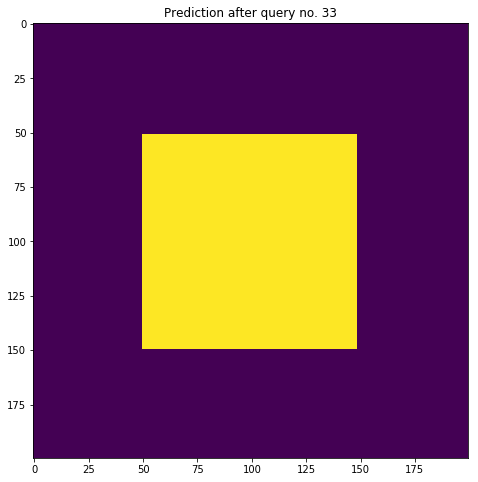

In [12]:
for round_idx in range(50):
    query_idx, query_inst = learner.query(pool)
    learner.add_and_retrain(pool[query_idx].reshape(1, -1), y[query_idx].reshape(-1, ))
    try:
        plt.figure(figsize=(8, 8))
        plt.imshow(learner.predict(pool).reshape(im_height, im_width))
        plt.title('Prediction after query no. ' + str(round_idx+1))
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.1)
        plt.close()
    except KeyboardInterrupt:
        break